In [1]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

# LAB 2

In [2]:
df=pd.read_csv('./files_for_lab/csv_files/marketing_customer_analysis.csv')

df

,Unnamed: 0,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,...,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size,Vehicle Type
0,0,DK49336,Arizona,4809.216960,No,Basic,College,2/18/11,Employed,M,...,0.0,9,Corporate Auto,Corporate L3,Offer3,Agent,292.800000,Four-Door Car,Medsize,NaN
1,1,KX64629,California,2228.525238,No,Basic,College,1/18/11,Unemployed,F,...,0.0,1,Personal Auto,Personal L3,Offer4,Call Center,744.924331,Four-Door Car,Medsize,NaN
2,2,LZ68649,Washington,14947.917300,No,Basic,Bachelor,2/10/11,Employed,M,...,0.0,2,Personal Auto,Personal L3,Offer3,Call Center,480.000000,SUV,Medsize,A
3,3,XL78013,Oregon,22332.439460,Yes,Extended,College,1/11/11,Employed,M,...,0.0,2,Corporate Auto,Corporate L3,Offer2,Branch,484.013411,Four-Door Car,Medsize,A
4,4,QA50777,Oregon,9025.067525,No,Premium,Bachelor,1/17/11,Medical Leave,F,...,NaN,7,Personal Auto,Personal L2,Offer1,Branch,707.925645,Four-Door Car,Medsize,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10905,10905,FE99816,Nevada,15563.369440,No,Premium,Bachelor,1/19/11,Unemployed,F,...,NaN,7,Personal Auto,Personal L1,Offer3,Web,1214.400000,Luxury Car,Medsize,A
10906,10906,KX53892,Oregon,5259.444853,No,Basic,College,1/6/11,Employed,F,...,0.0,6,Personal Auto,Personal L3,Offer2,Branch,273.018929,Four-Door Car,Medsize,A
10907,10907,TL39050,Arizona,23893.304100,No,Extended,Bachelor,2/6/11,Employed,F,...,0.0,2,Corporate Auto,Corporate L3,Offer1,Web,381.306996,Luxury SUV,Medsize,NaN
10908,10908,WA60547,California,11971.977650,No,Premium,College,2/13/11,Employed,F,...,4.0,6,Personal Auto,Personal L1,Offer1,Branch,618.288849,SUV,Medsize,A


In [3]:
df=df.drop(['Unnamed: 0'], axis=1)

#### 1. Show the dataframe shape.

In [4]:
df.shape

(10910, 25)

#### 2. Standardize header names.

In [5]:
cols_df=[col_name.lower().replace(' ','_') for col_name in df.columns]
df.columns=cols_df

#### 3. Which columns are numerical?

In [6]:
numericals=df.select_dtypes('number')
numericals

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount
0,4809.216960,48029,61,7.0,52,0.0,9,292.800000
1,2228.525238,0,64,3.0,26,0.0,1,744.924331
2,14947.917300,22139,100,34.0,31,0.0,2,480.000000
3,22332.439460,49078,97,10.0,3,0.0,2,484.013411
4,9025.067525,23675,117,NaN,31,NaN,7,707.925645
...,...,...,...,...,...,...,...,...
10905,15563.369440,0,253,NaN,40,NaN,7,1214.400000
10906,5259.444853,61146,65,7.0,68,0.0,6,273.018929
10907,23893.304100,39837,201,11.0,63,0.0,2,381.306996
10908,11971.977650,64195,158,0.0,27,4.0,6,618.288849


#### 4. Which columns are categorical?

In [7]:
categoricals=df.select_dtypes('object')
categoricals

,customer,state,response,coverage,education,effective_to_date,employmentstatus,gender,location_code,marital_status,policy_type,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size,vehicle_type
0,DK49336,Arizona,No,Basic,College,2/18/11,Employed,M,Suburban,Married,Corporate Auto,Corporate L3,Offer3,Agent,Four-Door Car,Medsize,NaN
1,KX64629,California,No,Basic,College,1/18/11,Unemployed,F,Suburban,Single,Personal Auto,Personal L3,Offer4,Call Center,Four-Door Car,Medsize,NaN
2,LZ68649,Washington,No,Basic,Bachelor,2/10/11,Employed,M,Suburban,Single,Personal Auto,Personal L3,Offer3,Call Center,SUV,Medsize,A
3,XL78013,Oregon,Yes,Extended,College,1/11/11,Employed,M,Suburban,Single,Corporate Auto,Corporate L3,Offer2,Branch,Four-Door Car,Medsize,A
4,QA50777,Oregon,No,Premium,Bachelor,1/17/11,Medical Leave,F,Suburban,Married,Personal Auto,Personal L2,Offer1,Branch,Four-Door Car,Medsize,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10905,FE99816,Nevada,No,Premium,Bachelor,1/19/11,Unemployed,F,Suburban,Married,Personal Auto,Personal L1,Offer3,Web,Luxury Car,Medsize,A
10906,KX53892,Oregon,No,Basic,College,1/6/11,Employed,F,Urban,Married,Personal Auto,Personal L3,Offer2,Branch,Four-Door Car,Medsize,A
10907,TL39050,Arizona,No,Extended,Bachelor,2/6/11,Employed,F,Rural,Married,Corporate Auto,Corporate L3,Offer1,Web,Luxury SUV,Medsize,NaN
10908,WA60547,California,No,Premium,College,2/13/11,Employed,F,Urban,Divorced,Personal Auto,Personal L1,Offer1,Branch,SUV,Medsize,A


#### 5. Check and deal with NaN values.

In [8]:
df.isna().sum()

customer                            0
state                             631
customer_lifetime_value             0
response                          631
coverage                            0
education                           0
effective_to_date                   0
employmentstatus                    0
gender                              0
income                              0
location_code                       0
marital_status                      0
monthly_premium_auto                0
months_since_last_claim           633
months_since_policy_inception       0
number_of_open_complaints         633
number_of_policies                  0
policy_type                         0
policy                              0
renew_offer_type                    0
sales_channel                       0
total_claim_amount                  0
vehicle_class                     622
vehicle_size                      622
vehicle_type                     5482
dtype: int64

In [9]:
df=df.drop('vehicle_type', axis=1)

In [10]:
df=df.dropna()

In [11]:
df.isna().sum()

customer                         0
state                            0
customer_lifetime_value          0
response                         0
coverage                         0
education                        0
effective_to_date                0
employmentstatus                 0
gender                           0
income                           0
location_code                    0
marital_status                   0
monthly_premium_auto             0
months_since_last_claim          0
months_since_policy_inception    0
number_of_open_complaints        0
number_of_policies               0
policy_type                      0
policy                           0
renew_offer_type                 0
sales_channel                    0
total_claim_amount               0
vehicle_class                    0
vehicle_size                     0
dtype: int64

#### 6. Datetime format - Extract the months from the dataset and store in a separate column. Then filter the data to show only the information for the first quarter , ie. January, February and March. Hint: If data from March does not exist, consider only January and February.

In [12]:
df['effective_to_date']=pd.to_datetime(df['effective_to_date'], errors='coerce')

In [13]:
df['MONTH'] = df['effective_to_date'].dt.month

In [14]:
df

,customer,state,customer_lifetime_value,response,coverage,education,effective_to_date,employmentstatus,gender,income,...,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size,MONTH
0,DK49336,Arizona,4809.216960,No,Basic,College,2011-02-18,Employed,M,48029,...,0.0,9,Corporate Auto,Corporate L3,Offer3,Agent,292.800000,Four-Door Car,Medsize,2
1,KX64629,California,2228.525238,No,Basic,College,2011-01-18,Unemployed,F,0,...,0.0,1,Personal Auto,Personal L3,Offer4,Call Center,744.924331,Four-Door Car,Medsize,1
2,LZ68649,Washington,14947.917300,No,Basic,Bachelor,2011-02-10,Employed,M,22139,...,0.0,2,Personal Auto,Personal L3,Offer3,Call Center,480.000000,SUV,Medsize,2
3,XL78013,Oregon,22332.439460,Yes,Extended,College,2011-01-11,Employed,M,49078,...,0.0,2,Corporate Auto,Corporate L3,Offer2,Branch,484.013411,Four-Door Car,Medsize,1
6,IW72280,California,5035.035257,No,Basic,Doctor,2011-02-14,Employed,F,37405,...,3.0,4,Corporate Auto,Corporate L2,Offer2,Branch,287.556107,Four-Door Car,Medsize,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10903,SU71163,Arizona,2771.663013,No,Basic,College,2011-01-07,Employed,M,59855,...,4.0,1,Personal Auto,Personal L2,Offer2,Branch,355.200000,Two-Door Car,Medsize,1
10904,QI63521,Nevada,19228.463620,No,Basic,High School or Below,2011-02-24,Unemployed,M,0,...,0.0,2,Personal Auto,Personal L2,Offer1,Branch,897.600000,Luxury SUV,Medsize,2
10906,KX53892,Oregon,5259.444853,No,Basic,College,2011-01-06,Employed,F,61146,...,0.0,6,Personal Auto,Personal L3,Offer2,Branch,273.018929,Four-Door Car,Medsize,1
10907,TL39050,Arizona,23893.304100,No,Extended,Bachelor,2011-02-06,Employed,F,39837,...,0.0,2,Corporate Auto,Corporate L3,Offer1,Web,381.306996,Luxury SUV,Medsize,2


# START of LAB 3

7. Show DataFrame info.

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9134 entries, 0 to 10908
Data columns (total 25 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   customer                       9134 non-null   object        
 1   state                          9134 non-null   object        
 2   customer_lifetime_value        9134 non-null   float64       
 3   response                       9134 non-null   object        
 4   coverage                       9134 non-null   object        
 5   education                      9134 non-null   object        
 6   effective_to_date              9134 non-null   datetime64[ns]
 7   employmentstatus               9134 non-null   object        
 8   gender                         9134 non-null   object        
 9   income                         9134 non-null   int64         
 10  location_code                  9134 non-null   object        
 11  marital_status  

8. Describe DataFrame.

In [16]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
customer_lifetime_value,9134.0,8004.940475,6870.967608,1898.007675,3994.251794,5780.182197,8962.167041,83325.381190
income,9134.0,37657.380009,30379.904734,0.000000,0.000000,33889.500000,62320.000000,99981.000000
monthly_premium_auto,9134.0,93.219291,34.407967,61.000000,68.000000,83.000000,109.000000,298.000000
months_since_last_claim,9134.0,15.097000,10.073257,0.000000,6.000000,14.000000,23.000000,35.000000
months_since_policy_inception,9134.0,48.064594,27.905991,0.000000,24.000000,48.000000,71.000000,99.000000
number_of_open_complaints,9134.0,0.384388,0.910384,0.000000,0.000000,0.000000,0.000000,5.000000
number_of_policies,9134.0,2.966170,2.390182,1.000000,1.000000,2.000000,4.000000,9.000000
total_claim_amount,9134.0,434.088794,290.500092,0.099007,272.258244,383.945434,547.514839,2893.239678
MONTH,9134.0,1.463762,0.498712,1.000000,1.000000,1.000000,2.000000,2.000000


9. Show a plot of the total number of responses.

In [17]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import warnings
warnings.filterwarnings('ignore') # no more warnings 

<AxesSubplot:xlabel='response', ylabel='count'>

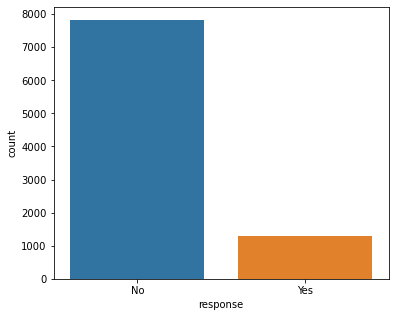

In [18]:
plt.figure(figsize=(6,5))
sns.countplot('response', data=df)

10. Show a plot of the response rate by the sales channel.

<AxesSubplot:xlabel='sales_channel', ylabel='count'>

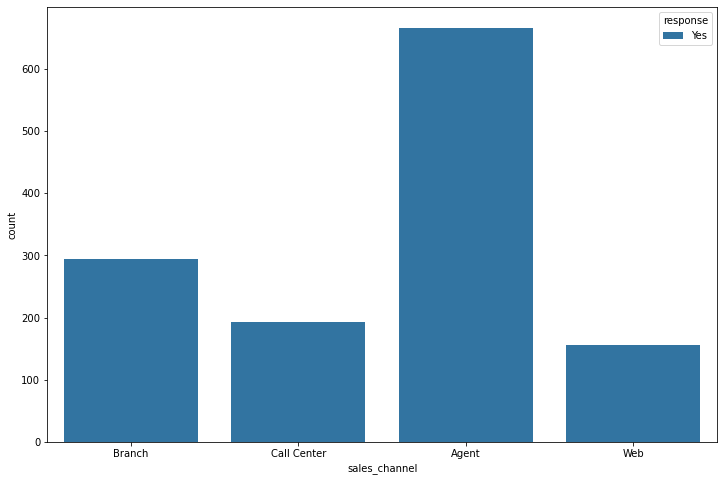

In [19]:
df_1=df[(df['response']=='Yes')]
plt.figure(figsize=(12,8))
sns.countplot('sales_channel', hue='response', data=df_1)

11. Show a plot of the response rate by the total claim amount.

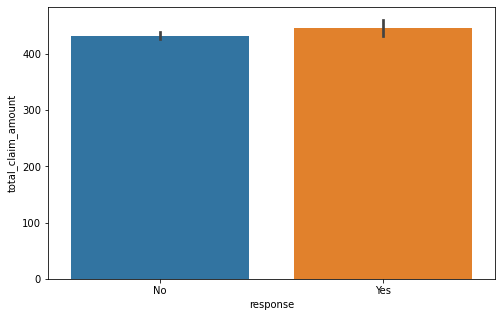

In [20]:
plt.figure(figsize=(8,5))
sns.barplot(x="response", y="total_claim_amount", data=df)
plt.show()

<AxesSubplot:xlabel='total_claim_amount', ylabel='Count'>

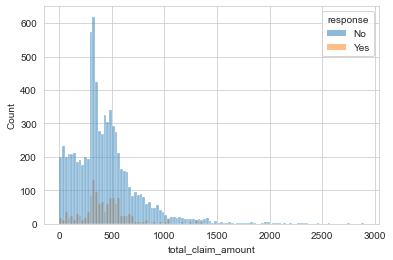

In [21]:
sns.set_style('whitegrid')
sns.histplot(data=df, x="total_claim_amount",  hue="response")

12. Show a plot of the response rate by income.

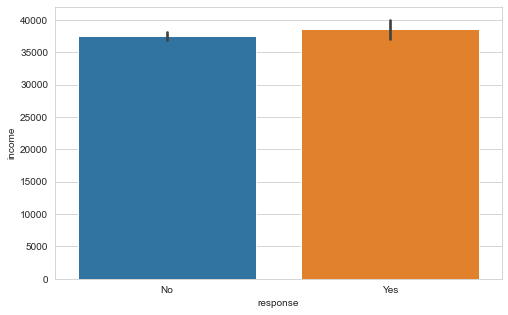

In [22]:
plt.figure(figsize=(8,5))

sns.barplot(x="response", y="income", data=df)
plt.show()

<AxesSubplot:xlabel='income', ylabel='Count'>

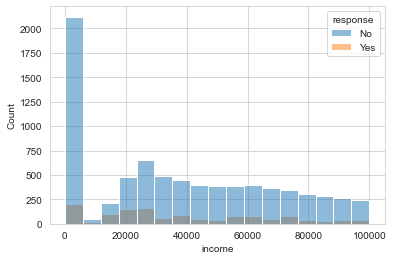

In [23]:
sns.set_style('whitegrid')
sns.histplot(data=df, x="income",  hue="response")

# Start of LAB4

1. Check the data types of the columns. Get the numeric data into dataframe called numerical and categorical columns in a dataframe called categoricals. (You can use np.number and np.object to select the numerical data types and categorical data types respectively)

In [24]:
df.dtypes

customer                                 object
state                                    object
customer_lifetime_value                 float64
response                                 object
coverage                                 object
education                                object
effective_to_date                datetime64[ns]
employmentstatus                         object
gender                                   object
income                                    int64
location_code                            object
marital_status                           object
monthly_premium_auto                      int64
months_since_last_claim                 float64
months_since_policy_inception             int64
number_of_open_complaints               float64
number_of_policies                        int64
policy_type                              object
policy                                   object
renew_offer_type                         object
sales_channel                           

In [25]:
df_numerical = df.select_dtypes(include='number')
df_numerical

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount,MONTH
0,4809.216960,48029,61,7.0,52,0.0,9,292.800000,2
1,2228.525238,0,64,3.0,26,0.0,1,744.924331,1
2,14947.917300,22139,100,34.0,31,0.0,2,480.000000,2
3,22332.439460,49078,97,10.0,3,0.0,2,484.013411,1
6,5035.035257,37405,63,8.0,99,3.0,4,287.556107,2
...,...,...,...,...,...,...,...,...,...
10903,2771.663013,59855,74,30.0,82,4.0,1,355.200000,1
10904,19228.463620,0,187,14.0,32,0.0,2,897.600000,2
10906,5259.444853,61146,65,7.0,68,0.0,6,273.018929,1
10907,23893.304100,39837,201,11.0,63,0.0,2,381.306996,2


In [26]:
df_categorical = df.select_dtypes(include='object')
df_categorical

,customer,state,response,coverage,education,employmentstatus,gender,location_code,marital_status,policy_type,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size
0,DK49336,Arizona,No,Basic,College,Employed,M,Suburban,Married,Corporate Auto,Corporate L3,Offer3,Agent,Four-Door Car,Medsize
1,KX64629,California,No,Basic,College,Unemployed,F,Suburban,Single,Personal Auto,Personal L3,Offer4,Call Center,Four-Door Car,Medsize
2,LZ68649,Washington,No,Basic,Bachelor,Employed,M,Suburban,Single,Personal Auto,Personal L3,Offer3,Call Center,SUV,Medsize
3,XL78013,Oregon,Yes,Extended,College,Employed,M,Suburban,Single,Corporate Auto,Corporate L3,Offer2,Branch,Four-Door Car,Medsize
6,IW72280,California,No,Basic,Doctor,Employed,F,Urban,Married,Corporate Auto,Corporate L2,Offer2,Branch,Four-Door Car,Medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10903,SU71163,Arizona,No,Basic,College,Employed,M,Suburban,Married,Personal Auto,Personal L2,Offer2,Branch,Two-Door Car,Medsize
10904,QI63521,Nevada,No,Basic,High School or Below,Unemployed,M,Suburban,Single,Personal Auto,Personal L2,Offer1,Branch,Luxury SUV,Medsize
10906,KX53892,Oregon,No,Basic,College,Employed,F,Urban,Married,Personal Auto,Personal L3,Offer2,Branch,Four-Door Car,Medsize
10907,TL39050,Arizona,No,Extended,Bachelor,Employed,F,Rural,Married,Corporate Auto,Corporate L3,Offer1,Web,Luxury SUV,Medsize


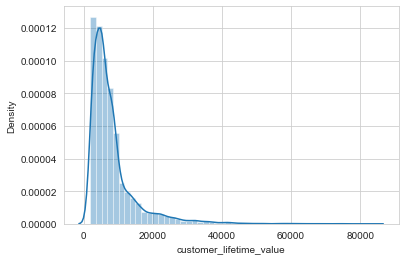

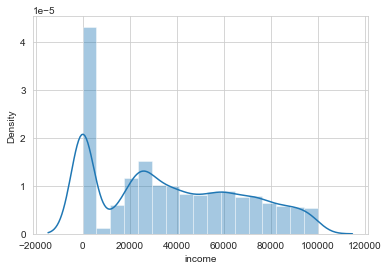

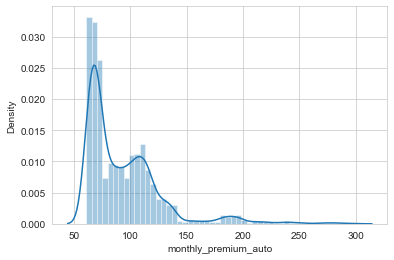

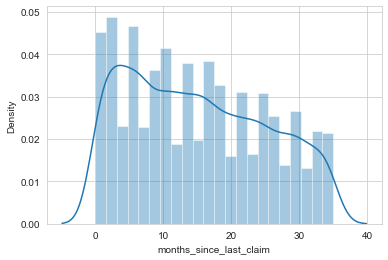

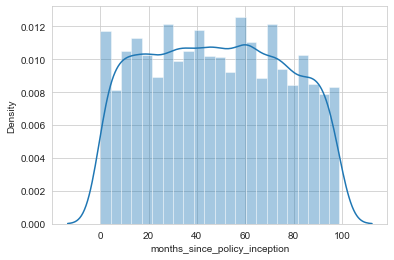

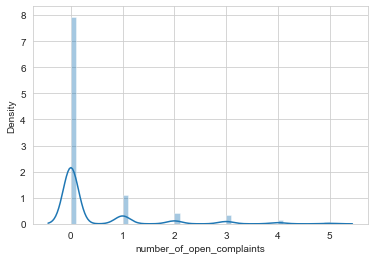

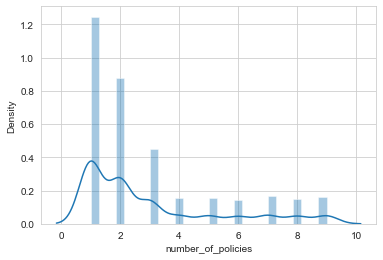

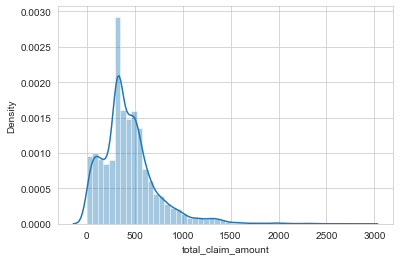

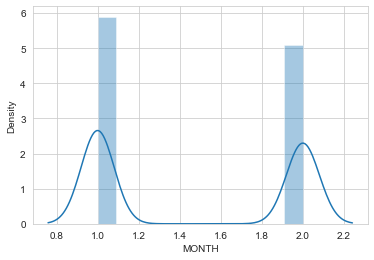

In [27]:
#Use seaborn library to construct distribution plots for the numerical variables
for column in df_numerical:
    sns.distplot(df_numerical[column])
    plt.show()  

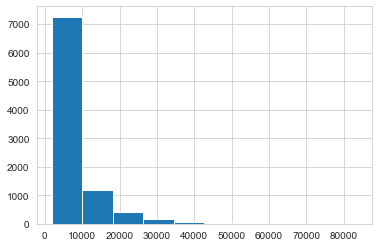

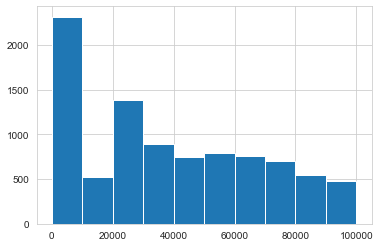

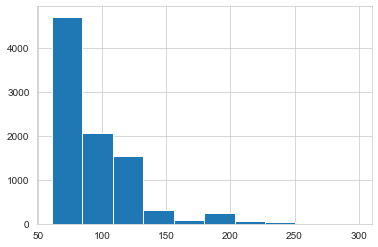

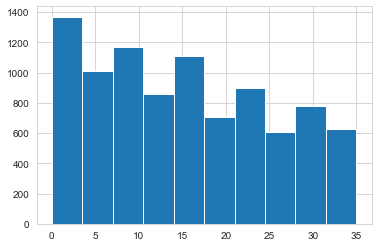

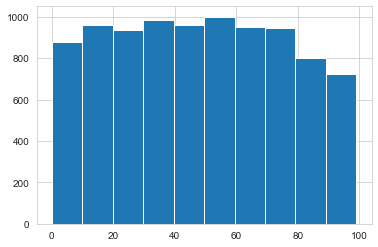

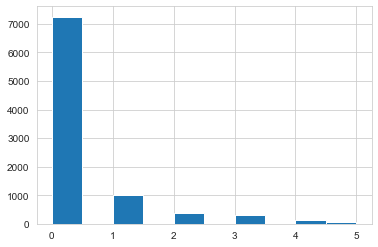

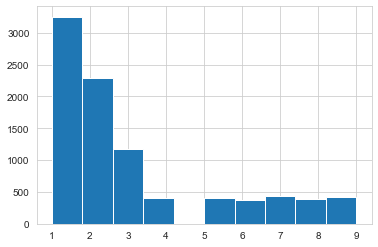

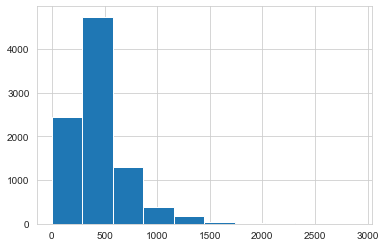

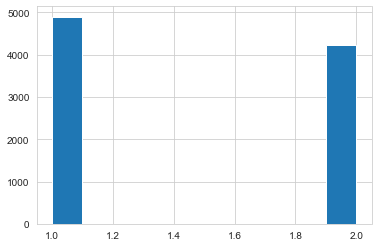

In [28]:
#Use Matplotlib to construct histograms
for column in df_numerical:
    df_numerical[column].hist()
    plt.show() 

#### For the numerical variables, check the multicollinearity between the features. Please note that we will use the column total_claim_amount later as the target variable.

In [29]:
df_features=df_numerical.drop(['total_claim_amount'], axis=1)
df_features

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,MONTH
0,4809.216960,48029,61,7.0,52,0.0,9,2
1,2228.525238,0,64,3.0,26,0.0,1,1
2,14947.917300,22139,100,34.0,31,0.0,2,2
3,22332.439460,49078,97,10.0,3,0.0,2,1
6,5035.035257,37405,63,8.0,99,3.0,4,2
...,...,...,...,...,...,...,...,...
10903,2771.663013,59855,74,30.0,82,4.0,1,1
10904,19228.463620,0,187,14.0,32,0.0,2,2
10906,5259.444853,61146,65,7.0,68,0.0,6,1
10907,23893.304100,39837,201,11.0,63,0.0,2,2


In [30]:
correlations_matrix = df_features.corr(method='spearman')  # method='spearman'
correlations_matrix

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,MONTH
customer_lifetime_value,1.000000,0.055395,0.453933,0.005126,-0.002429,-0.031312,0.488860,-0.004966
income,0.055395,1.000000,-0.017608,-0.025784,-0.001945,0.006334,-0.010273,-0.000383
monthly_premium_auto,0.453933,-0.017608,1.000000,-0.005989,0.014596,-0.012751,-0.006936,0.015626
months_since_last_claim,0.005126,-0.025784,-0.005989,1.000000,-0.048269,0.005736,0.011439,-0.020286
months_since_policy_inception,-0.002429,-0.001945,0.014596,-0.048269,1.000000,-0.013233,-0.009546,0.010824
number_of_open_complaints,-0.031312,0.006334,-0.012751,0.005736,-0.013233,1.000000,0.001523,-0.005091
number_of_policies,0.488860,-0.010273,-0.006936,0.011439,-0.009546,0.001523,1.000000,0.003543
MONTH,-0.004966,-0.000383,0.015626,-0.020286,0.010824,-0.005091,0.003543,1.000000


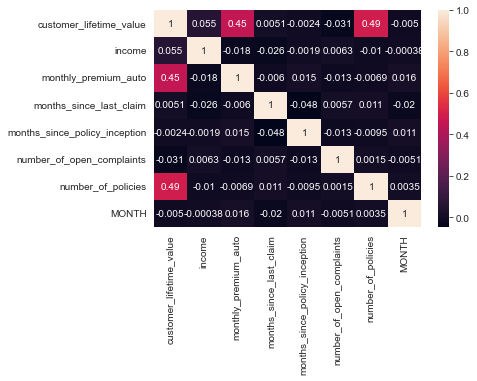

In [31]:
sns_plot = sns.heatmap(correlations_matrix, annot=True)
figure = sns_plot.get_figure()    
figure.savefig('svm_conf.png', dpi=400)
plt.show()
# plt.savefig('name_i_want.png')

#### Drop one of the two features that show a high correlation between them (greater than 0.9). Write code for both the correlation matrix and for seaborn heatmap. If there is no pair of features that have a high correlation, then do not drop any features

I didnt find any column with high correlation

# Start of LAB5

In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import StandardScaler

import warnings
warnings.filterwarnings('ignore')

In [33]:
# X-y split.

In [34]:
X = df.drop('total_claim_amount', axis=1)
y = df['total_claim_amount']

In [35]:
X_num = X.select_dtypes(include = np.number)
X_cat = X.select_dtypes(include = np.object)

In [36]:
X_num.isna().sum()

customer_lifetime_value          0
income                           0
monthly_premium_auto             0
months_since_last_claim          0
months_since_policy_inception    0
number_of_open_complaints        0
number_of_policies               0
MONTH                            0
dtype: int64

In [37]:
  #X_num[X_num['months_since_last_claim'].isna() & X_num['number_of_open_complaints'].isna()]

In [38]:
  #X_num=  X_num.dropna(subset=['months_since_last_claim', 'number_of_open_complaints'])

In [39]:
X_num.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9134 entries, 0 to 10908
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   customer_lifetime_value        9134 non-null   float64
 1   income                         9134 non-null   int64  
 2   monthly_premium_auto           9134 non-null   int64  
 3   months_since_last_claim        9134 non-null   float64
 4   months_since_policy_inception  9134 non-null   int64  
 5   number_of_open_complaints      9134 non-null   float64
 6   number_of_policies             9134 non-null   int64  
 7   MONTH                          9134 non-null   int64  
dtypes: float64(3), int64(5)
memory usage: 900.3 KB


## Normalizing data

In [40]:
import pickle

In [41]:
# Normalizing data
transformer = Normalizer() # Normalizer works column wise, so don't use it on the target 
# (X-y split comes first, or else your features will carry information from the target)
transformer.fit(X_num) # you'll always only fit on the trainning data

# When Normalizing with encoded categorical data, you'll lose some information on the categories.
# When Normalizing only numericals, you'll be losing proportion between numericals and encoded categories.

#saving objects in my computer
with open('transformer.pkl', 'wb') as file:
    pickle.dump(transformer, file)
#loading object from my computer  
with open('transformer.pkl', 'rb') as file:
    transformer = pickle.load(file)

x_normalized = transformer.transform(X_num)
#pd.DataFrame(x_normalized)
x_normalized#.shape

array([[9.96331516e-02, 9.95022824e-01, 1.26374466e-03, ...,
        0.00000000e+00, 1.86454130e-04, 4.14342511e-05],
       [9.99518804e-01, 0.00000000e+00, 2.87047247e-02, ...,
        0.00000000e+00, 4.48511324e-04, 4.48511324e-04],
       [5.59573341e-01, 8.28770586e-01, 3.74348700e-03, ...,
        0.00000000e+00, 7.48697400e-05, 7.48697400e-05],
       ...,
       [8.56980004e-02, 9.96319969e-01, 1.05911749e-03, ...,
        0.00000000e+00, 9.77646913e-05, 1.62941152e-05],
       [5.14349634e-01, 8.57568559e-01, 4.32691418e-03, ...,
        0.00000000e+00, 4.30538725e-05, 4.30538725e-05],
       [1.83332463e-01, 9.83047898e-01, 2.41952750e-03, ...,
        6.12538608e-05, 9.18807912e-05, 3.06269304e-05]])

In [42]:
# using standard scaler
transformer_Stand = StandardScaler() # StandardScaler and MinMax scaler works row wise,
# so make sure you do the train-test split first (optional)
# (train-test split comes first, or else your trainning set will carry information from your test set)
transformer_Stand.fit(X_num)

x_standardized = transformer_Stand.transform(X_num)
x_standardized#.shape
pd.DataFrame(x_standardized)

,0,1,2,3,4,5,6,7
0,-0.465131,0.341416,-0.936442,-0.803856,0.141031,-0.422250,2.524561,1.075304
1,-0.840745,-1.239617,-0.849248,-1.200968,-0.790719,-0.422250,-0.822648,-0.929969
2,1.010536,-0.510839,0.197079,1.876656,-0.611536,-0.422250,-0.404247,1.075304
3,2.085337,0.375947,0.109885,-0.506021,-1.614960,-0.422250,-0.404247,-0.929969
4,-0.432263,-0.008308,-0.878312,-0.704577,1.825350,2.873245,0.432555,1.075304
...,...,...,...,...,...,...,...,...
9129,-0.761692,0.730708,-0.558602,1.479543,1.216128,3.971744,-0.822648,-0.929969
9130,1.633560,-1.239617,2.725701,-0.108908,-0.575700,-0.422250,-0.404247,1.075304
9131,-0.399601,0.773205,-0.820183,-0.803856,0.714416,-0.422250,1.269358,-0.929969
9132,2.312518,0.071749,3.132606,-0.406743,0.535234,-0.422250,-0.404247,1.075304


# Start of LAB6

In [43]:
X_cat

,customer,state,response,coverage,education,employmentstatus,gender,location_code,marital_status,policy_type,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size
0,DK49336,Arizona,No,Basic,College,Employed,M,Suburban,Married,Corporate Auto,Corporate L3,Offer3,Agent,Four-Door Car,Medsize
1,KX64629,California,No,Basic,College,Unemployed,F,Suburban,Single,Personal Auto,Personal L3,Offer4,Call Center,Four-Door Car,Medsize
2,LZ68649,Washington,No,Basic,Bachelor,Employed,M,Suburban,Single,Personal Auto,Personal L3,Offer3,Call Center,SUV,Medsize
3,XL78013,Oregon,Yes,Extended,College,Employed,M,Suburban,Single,Corporate Auto,Corporate L3,Offer2,Branch,Four-Door Car,Medsize
6,IW72280,California,No,Basic,Doctor,Employed,F,Urban,Married,Corporate Auto,Corporate L2,Offer2,Branch,Four-Door Car,Medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10903,SU71163,Arizona,No,Basic,College,Employed,M,Suburban,Married,Personal Auto,Personal L2,Offer2,Branch,Two-Door Car,Medsize
10904,QI63521,Nevada,No,Basic,High School or Below,Unemployed,M,Suburban,Single,Personal Auto,Personal L2,Offer1,Branch,Luxury SUV,Medsize
10906,KX53892,Oregon,No,Basic,College,Employed,F,Urban,Married,Personal Auto,Personal L3,Offer2,Branch,Four-Door Car,Medsize
10907,TL39050,Arizona,No,Extended,Bachelor,Employed,F,Rural,Married,Corporate Auto,Corporate L3,Offer1,Web,Luxury SUV,Medsize


In [44]:
X_cat.isna().sum()

customer            0
state               0
response            0
coverage            0
education           0
employmentstatus    0
gender              0
location_code       0
marital_status      0
policy_type         0
policy              0
renew_offer_type    0
sales_channel       0
vehicle_class       0
vehicle_size        0
dtype: int64

In [45]:
# droping 'vehicle type' column because half of rows are NaNs
#X_cat = X_cat.drop('vehicle_type', axis=1)

In [46]:
X_cat = X_cat.drop('customer', axis=1)


In [47]:
X_cat.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9134 entries, 0 to 10908
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   state             9134 non-null   object
 1   response          9134 non-null   object
 2   coverage          9134 non-null   object
 3   education         9134 non-null   object
 4   employmentstatus  9134 non-null   object
 5   gender            9134 non-null   object
 6   location_code     9134 non-null   object
 7   marital_status    9134 non-null   object
 8   policy_type       9134 non-null   object
 9   policy            9134 non-null   object
 10  renew_offer_type  9134 non-null   object
 11  sales_channel     9134 non-null   object
 12  vehicle_class     9134 non-null   object
 13  vehicle_size      9134 non-null   object
dtypes: object(14)
memory usage: 1.3+ MB


In [48]:
#X_cat=  X_cat.dropna(subset=['state', 'response','vehicle_class','vehicle_size'])

In [49]:
X_cat['education'].value_counts()

Bachelor                2748
College                 2681
High School or Below    2622
Master                   741
Doctor                   342
Name: education, dtype: int64

#### Get Dummies

In [50]:
cat_data=pd.get_dummies(X_cat, drop_first=True)
cat_data

,state_California,state_Nevada,state_Oregon,state_Washington,response_Yes,coverage_Extended,coverage_Premium,education_College,education_Doctor,education_High School or Below,...,sales_channel_Branch,sales_channel_Call Center,sales_channel_Web,vehicle_class_Luxury Car,vehicle_class_Luxury SUV,vehicle_class_SUV,vehicle_class_Sports Car,vehicle_class_Two-Door Car,vehicle_size_Medsize,vehicle_size_Small
0,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0
1,1,0,0,0,0,0,0,1,0,0,...,0,1,0,0,0,0,0,0,1,0
2,0,0,0,1,0,0,0,0,0,0,...,0,1,0,0,0,1,0,0,1,0
3,0,0,1,0,1,1,0,1,0,0,...,1,0,0,0,0,0,0,0,1,0
6,1,0,0,0,0,0,0,0,1,0,...,1,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10903,0,0,0,0,0,0,0,1,0,0,...,1,0,0,0,0,0,0,1,1,0
10904,0,1,0,0,0,0,0,0,0,1,...,1,0,0,0,1,0,0,0,1,0
10906,0,0,1,0,0,0,0,1,0,0,...,1,0,0,0,0,0,0,0,1,0
10907,0,0,0,0,0,1,0,0,0,0,...,0,0,1,0,1,0,0,0,1,0


In [51]:
df['total_claim_amount']

0        292.800000
1        744.924331
2        480.000000
3        484.013411
6        287.556107
            ...    
10903    355.200000
10904    897.600000
10906    273.018929
10907    381.306996
10908    618.288849
Name: total_claim_amount, Length: 9134, dtype: float64

In [52]:
df.groupby('marital_status', as_index=False).agg({'total_claim_amount': 'mean'})

,marital_status,total_claim_amount
0,Divorced,403.704718
1,Married,384.517033
2,Single,557.407396


In [53]:
df.groupby('marital_status', as_index=False).agg({'total_claim_amount': 'median'})

,marital_status,total_claim_amount
0,Divorced,355.20000
1,Married,346.29235
2,Single,494.40000


In [54]:
df.groupby(['gender'])['gender'].count()

gender
F    4658
M    4476
Name: gender, dtype: int64

### ONE HOT ENCODER

In [55]:
# in case you need to use the encode somewhere else besides your notebook:
encoder = OneHotEncoder(handle_unknown='error', drop='first')
encoder.fit(X_cat)

OneHotEncoder(drop='first')

In [56]:
encoded = encoder.transform(X_cat).toarray()
encoded#.shape # 

array([[0., 0., 0., ..., 0., 1., 0.],
       [1., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       ...,
       [0., 0., 1., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [1., 0., 0., ..., 0., 1., 0.]])

In [57]:
encoder.categories_

[array(['Arizona', 'California', 'Nevada', 'Oregon', 'Washington'],
       dtype=object),
 array(['No', 'Yes'], dtype=object),
 array(['Basic', 'Extended', 'Premium'], dtype=object),
 array(['Bachelor', 'College', 'Doctor', 'High School or Below', 'Master'],
       dtype=object),
 array(['Disabled', 'Employed', 'Medical Leave', 'Retired', 'Unemployed'],
       dtype=object),
 array(['F', 'M'], dtype=object),
 array(['Rural', 'Suburban', 'Urban'], dtype=object),
 array(['Divorced', 'Married', 'Single'], dtype=object),
 array(['Corporate Auto', 'Personal Auto', 'Special Auto'], dtype=object),
 array(['Corporate L1', 'Corporate L2', 'Corporate L3', 'Personal L1',
        'Personal L2', 'Personal L3', 'Special L1', 'Special L2',
        'Special L3'], dtype=object),
 array(['Offer1', 'Offer2', 'Offer3', 'Offer4'], dtype=object),
 array(['Agent', 'Branch', 'Call Center', 'Web'], dtype=object),
 array(['Four-Door Car', 'Luxury Car', 'Luxury SUV', 'SUV', 'Sports Car',
        'Two-Door Car'],

In [58]:
X_new= np.concatenate([X_num, encoded], axis=1)

###  Linear Regression TRAIN TEST SPLIT

In [59]:
X_train, X_test, y_train, y_test = train_test_split(X_new, y, test_size=0.3, random_state=42)

In [60]:
model = LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [61]:
predictions  = model.predict(X_test)
predictions.shape

(2741,)

In [64]:
rmse = mean_squared_error(y_test, predictions, squared=False)

In [65]:
print("R2_score:", round(r2_score(y_test, predictions),2)) # or r2_score(Y, predictions)
print("RMSE:", rmse)
print("MAE:", mean_absolute_error(y_test, predictions))
print("MSE:", mean_squared_error(y_test, predictions))

R2_score: 0.78
RMSE: 138.06902819131236
MAE: 95.3743815609416
MSE: 19063.056545693405
